In [47]:
!pip install keras

In [48]:
!pip install tensorflow==1.14.0

  Using cached https://files.pythonhosted.org/packages/a0/df/635cdb901ee4a8a42ec68e480c49f85f4c59e8816effbf57d9e6ee8b3588/setuptools-46.1.3-py3-none-any.whl
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\easy_install.cpython-37.pyc'
Consider using the `--user` option or check the permissions.



In [49]:
from keras.layers import Input,Lambda,Dense,Flatten

In [50]:
!pip install h5py

In [1]:
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
from keras.applications.vgg19 import VGG19

using a pre trained neural network,transfer learning

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE=[224,224]

In [78]:
train_path='C:/Users/Raman/Desktop/cell_images/train'

In [79]:
test_path='C:/Users/Raman/Desktop/cell_images/test'

In [7]:
vgg=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

W0411 12:28:00.360587  8064 deprecation_wrapper.py:119] From C:\Users\Raman\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [96]:
for layer in vgg.layers:
    layer.trainable=False
#now using glob gor getting number of classes to predicted with the help of folder
folder=glob('C:/Users/Mohd Shafahad/Desktop/cell_images/train/*')

In [97]:
x=Flatten()(vgg.output)

In [98]:
prediction=Dense(len(folder),activation='softmax')(x)

In [99]:
model=Model(inputs=vgg.input,outputs=prediction)

In [100]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [101]:
model.compile(
       loss='categorical_crossentropy',
       optimizer='adam',
       metrics=['accuracy'])

        
        

In [102]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [103]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [104]:
training_set=train_datagen.flow_from_directory('C:/Users/Raman/Desktop/cell_images/train',
                                              target_size=(224,224),batch_size=32,class_mode='categorical')

Found 26104 images belonging to 2 classes.


In [90]:
test_set=test_datagen.flow_from_directory('C:/Users/Raman/Desktop/cell_images/test',
                                         target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1454 images belonging to 2 classes.


In [105]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=2,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/2
816/816 [==============================] - 4793s 6s/step - loss: 0.3682 - accuracy: 0.8432 - val_loss: 4.7706 - val_accuracy: 0.1706
Epoch 2/2
816/816 [==============================] - 4441s 5s/step - loss: 0.2738 - accuracy: 0.8947 - val_loss: 3.7101 - val_accuracy: 0.1602


In [106]:
model.save('my_model.h5')

In [107]:
from keras.models import Model
from keras.models import load_model

In [108]:
new_model=load_model('my_model.h5')
new_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

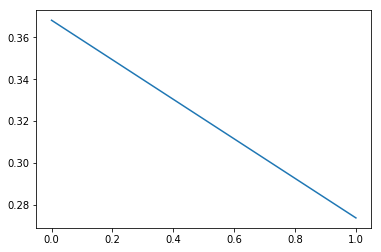

In [109]:
plt.plot(r.history['loss'],label='train loss')

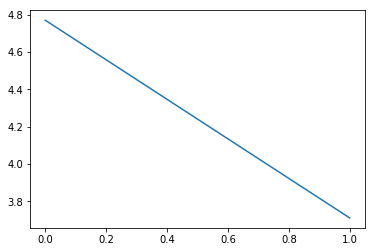

In [110]:
plt.plot(r.history['val_loss'],label='val loss')

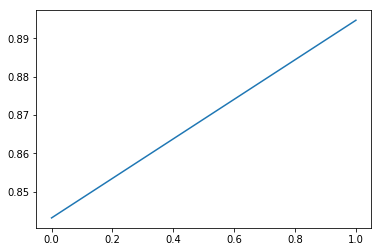

In [111]:
plt.plot(r.history['accuracy'],label='accuracy')

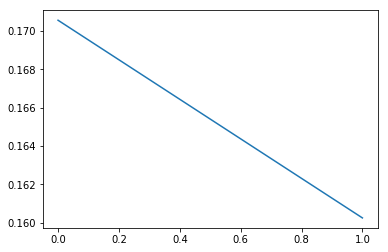

In [112]:
plt.plot(r.history['val_accuracy'],label='val_accuracy')

In [113]:
from keras.preprocessing import image
import numpy as np

In [115]:
img=image.load_img('C:/Users/Raman/Desktop/f1.png',target_size=(224,224))

In [116]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)



In [117]:
from keras.applications.vgg16 import preprocess_input

In [118]:
img_data=preprocess_input(x)

In [119]:
prediction=new_model.predict(img_data)
if(prediction[0][0]>0.5):
    print('Parasitic')
else:
    print('Uninfected')


Parasitic
